# Group Detetails

1. Name= Nitesh Ramesh Morem---------------------------------------------------Matriculation Number= 35611655
2. Name= Kashif Riyaz---------------------------------------------------------------Matriculation Number= 35370305

# Installing and  importing necessary modules

In [1]:
!pip install seaborn pandas numpy scipy matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# 1. Task 1 (Data Preprocessing)


## a)



In [4]:
# reading  coachs csv file
df_feco=pd.read_csv('female_coaches.csv')
df_maco=pd.read_csv('male_coaches.csv')
print(f'The shape of female_coaches.csv file is {df_feco.shape} and male_coaches.csv file is {df_maco.shape}')
# reading players csv file
df_fepl=pd.read_csv('female_players.csv')
df_mapl=pd.read_csv('male_players.csv')
print(f'The shape of female_players.csv file is {df_fepl.shape} and male_players.csv file is {df_mapl.shape}')
# reading teams
df_fete=pd.read_csv('female_teams.csv')
df_mate=pd.read_csv('male_teams.csv')
print(f'The shape of female_teams.csv file is {df_fete.shape} and male_teams.csv file is {df_mate.shape}')


The shape of female_coaches.csv file is (94, 8) and male_coaches.csv file is (1369, 8)


C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\2433300494.py:7: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mapl=pd.read_csv('male_players.csv')


The shape of female_players.csv file is (5035, 109) and male_players.csv file is (180021, 109)
The shape of female_teams.csv file is (231, 54) and male_teams.csv file is (6947, 54)


## b)


In [5]:
# checking the total number of columns in data frame
df_fepl_columns= len(df_fepl.columns)
df_mapl_columns=len(df_mapl.columns)
print(f'There are {df_fepl_columns} columns in female_players.CSV file and {df_mapl_columns} columns in male_players.CSV file.')
df_fete_columns=len(df_fete.columns)
df_mate_columns=len(df_mate.columns)
print(f'There are {df_fete_columns} columns in female_teams.CSV file and {df_mate_columns} columns in male_teams.CSV file.  ')
df_feco_columns=len(df_feco.columns)
df_maco_columns=len(df_maco.columns)
print(f'There are {df_feco_columns} columns in female_feco.CSV file and {df_maco_columns} columns in male_maco.CSV file.  ')

There are 109 columns in female_players.CSV file and 109 columns in male_players.CSV file.
There are 54 columns in female_teams.CSV file and 54 columns in male_teams.CSV file.  
There are 8 columns in female_feco.CSV file and 8 columns in male_maco.CSV file.  


## C)


In [6]:
# Adding additional column 'Sex' to all six DataFrames
df_fete['Sex']=np.zeros(len(df_fete))
df_mate['Sex']=np.ones(len(df_mate))

df_mapl['Sex']=np.ones(len(df_mapl))
df_fepl['Sex']=np.zeros(len(df_fepl))

df_maco['Sex']=np.ones(len(df_maco))
df_feco['Sex']=np.zeros(len(df_feco))


In [7]:
# merging the DataFrames with same Sex
player=pd.concat([df_fepl,df_mapl],ignore_index=True)
coach=pd.concat([df_feco,df_maco],ignore_index=True)
team=pd.concat([df_fete,df_mate],ignore_index=True)


## d)



In [8]:
# creating df_plyayers with 27 columns.
df_player=player[['player_id', 'fifa_version', 'long_name',
'player_positions', 'value_eur', 'wage_eur', 'dob', 'height_cm', 'weight_kg',
'club_team_id', 'club_name', 'league_id', 'league_name', 'club_position',
'club_jersey_number','club_joined_date', 'club_contract_valid_until_year',
'nationality_id', 'nationality_name', 'nation_team_id', 'preferred_foot',
'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','Sex']]
# creating df_teams with 18 columns
df_team=team[['team_id', 'fifa_version', 'team_name', 'league_id',
'league_name', 'nationality_id', 'nationality_name', 'overall', 'attack',
'midfield', 'defence', 'coach_id', 'home_stadium', 'whole_team_average_age',
'captain', 'penalties', 'left_corner', 'right_corner','Sex']]
# cretaing df_coaches with 4 columns
df_coach=coach[['coach_id', 'long_name', 'dob', 'nationality_name','Sex']]

# checking the shape of every DataFrame
print(f'The shape of the df_player DataFrame is {df_player.shape}')
print(f'The shape of the df_team DataFrame is {df_team.shape}')
print(f'The shape of the df_coach DataFrame is {df_coach.shape}')

The shape of the df_player DataFrame is (185056, 28)
The shape of the df_team DataFrame is (7178, 19)
The shape of the df_coach DataFrame is (1463, 5)


## e)


### I)  Working on df_coach

In [9]:
# columns in this data set
df_coach.columns

Index(['coach_id', 'long_name', 'dob', 'nationality_name', 'Sex'], dtype='object')

In [10]:
#checking the missingn values on the data frame
missing_value=df_coach.isnull().sum().to_frame(name='number of missing values')
print(f'The number of rows in the df_coaches are {df_coach.shape[0]}')
missing_value

The number of rows in the df_coaches are 1463


,number of missing values
coach_id,0
long_name,0
dob,124
nationality_name,0
Sex,0


In [11]:
# replacing the nan values with mean value in dob column
df_coach['dob']=pd.to_datetime(df_coach['dob'])
mean_value=df_coach['dob'].mean().date()
df_coach.loc[:,'dob']=df_coach['dob'].fillna(mean_value)
df_coach.isnull().sum().to_frame(name='number of missing values')

C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\429544939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coach['dob']=pd.to_datetime(df_coach['dob'])


,number of missing values
coach_id,0
long_name,0
dob,0
nationality_name,0
Sex,0


Here we have filled the missing value with the mean value of dob.
* First we converted the values of dob into timedate value.
* Then we calculated the mean and only took the date.
*  At last we replaced the nan vales with mean data value.

### II) Working on df_team

In [12]:
df_team.columns

Index(['team_id', 'fifa_version', 'team_name', 'league_id', 'league_name',
       'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield',
       'defence', 'coach_id', 'home_stadium', 'whole_team_average_age',
       'captain', 'penalties', 'left_corner', 'right_corner', 'Sex'],
      dtype='object')

In [13]:
df_team.isnull().sum().to_frame(name='number of missing values')

,number of missing values
team_id,0
fifa_version,0
team_name,0
league_id,0
league_name,0
nationality_id,0
nationality_name,0
overall,0
attack,0
midfield,0


In the first section of this code the data in being grouped by the team_name and then the values are filled by bfill()

In [14]:
# Grouping the teams together based on the team and then using backward fill to fill tha Nan values of previous game.
df_team.loc[:,'home_stadium']=df_team.groupby('team_name')['home_stadium'].bfill()
df_team.loc[:,'coach_id']=df_team.groupby('team_name')['coach_id'].bfill()
df_team.loc[:,'captain']=df_team.groupby('team_name')['captain'].bfill()
df_team.loc[:,'penalties']=df_team.groupby('team_name')['penalties'].bfill()
df_team.loc[:,'left_corner']=df_team.groupby('team_name')['left_corner'].bfill()
df_team.loc[:,'right_corner']=df_team.groupby('team_name')['right_corner'].bfill()

df_team.isnull().sum().to_frame(name='number of missing values')

,number of missing values
team_id,0
fifa_version,0
team_name,0
league_id,0
league_name,0
nationality_id,0
nationality_name,0
overall,0
attack,0
midfield,0


As we still have missing values means these teams have missing values in the other versions of game as well so assigning the random values to these teams

In [15]:
# random values
coach_id=12345678.0
home_stadium='OTH Amberg Stadium'
Captain=123456.0
penalties=654321.0
left_corner=642135.0
right_corner=531246.0

In [16]:
#filling in the missing values in respective columns
df_team.loc[:,'coach_id']=df_team['coach_id'].fillna(coach_id)
df_team.loc[:,'home_stadium']=df_team['home_stadium'].fillna(home_stadium)
df_team.loc[:,'captain']=df_team['captain'].fillna(Captain)
df_team.loc[:,'penalties']=df_team['penalties'].fillna(penalties)
df_team.loc[:,'left_corner']=df_team['left_corner'].fillna(left_corner)
df_team.loc[:,'right_corner']=df_team['right_corner'].fillna(right_corner)


df_team.isnull().sum().to_frame(name='number of missing values')

,number of missing values
team_id,0
fifa_version,0
team_name,0
league_id,0
league_name,0
nationality_id,0
nationality_name,0
overall,0
attack,0
midfield,0


### III) Working on df_players

In [17]:
df_player.isnull().sum().to_frame(name='number of missing values')


,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,4898
wage_eur,4592
dob,0
height_cm,0
weight_kg,0
club_team_id,4655


#### Working with value_eur and wage_eur column

In [18]:
# using backward fill to fill value_eur same as used in prevsion version of fifa
df_player.loc[:,'value_eur']=df_player.groupby('long_name')['value_eur'].bfill()
print('Missing values in value_eur column:',df_player.loc[:,'value_eur'].isnull().sum())

# using backward fill to fill wage_eur same as used in prevsion version of fifa
df_player.loc[:,'wage_eur']=df_player.groupby('long_name')['wage_eur'].bfill()

print('Missing values in wage_eur column:',df_player.loc[:,'wage_eur'].isnull().sum())

Missing values in value_eur column: 4147
Missing values in wage_eur column: 3992


 we have players whoes value and wages are not present in any another version of the game so we will give them mean value and mean wages of all the players.in the data

In [19]:
# calculating the mean value and mean wage of value_eur column and wage_eur column
value_eur=int(df_player['value_eur'].mean())
wage_eur=int(df_player['wage_eur'].mean())
# replacing the Nan value with the mean value of Value_eur column.
df_player.loc[:,'value_eur']=df_player['value_eur'].fillna(value_eur)
df_player.loc[:,'wage_eur']=df_player['wage_eur'].fillna(wage_eur)
df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,4655


#### Working on club_team_id, club_name, league_name, club_position, club_jersey_number, club_contract_valid_until_year, club_joined_date


using backward fill method to fill the data from the previous fifa versions

In [20]:
df_player.loc[:,'club_team_id']=df_player.groupby('long_name')['club_team_id'].bfill()
df_player.loc[:,'club_name']=df_player.groupby('long_name')['club_name'].bfill()
df_player.loc[:,'league_id']=df_player.groupby('long_name')['league_id'].bfill()
df_player.loc[:,'league_name']=df_player.groupby('long_name')['league_name'].bfill()
df_player.loc[:,'club_position']=df_player.groupby('long_name')['club_team_id'].bfill()
df_player.loc[:,'club_jersey_number']=df_player.groupby('long_name')['club_jersey_number'].bfill()
df_player.loc[:,'club_contract_valid_until_year']=df_player.groupby('long_name')['club_contract_valid_until_year'].bfill()
df_player.loc[:,'club_joined_date']=df_player.groupby('long_name')['club_joined_date'].bfill()

df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,4105


now we have free agents who dont have any data related to club in any game

In [21]:
# Data used for free agent player
club_team_id=112233
club_name='free_agent'
league_id=122112
league_name='free_league_name'
club_position='bench'
club_jersey_number=00
club_contract_valid_until_year=2023
club_joined_date='18-06-2024'

In [22]:
# fliing the values of column club_joined_data
df_player.loc[df_player['club_name'].isna() & df_player['club_joined_date'].isna(), 'club_joined_date'] = df_player['club_joined_date'].fillna(club_joined_date)

# filling the missing values
df_player.loc[:,'club_team_id']=df_player['club_team_id'].fillna(club_team_id)
df_player.loc[:,'club_name']=df_player['club_name'].fillna(club_name)
df_player.loc[:,'league_id']=df_player['league_id'].fillna(league_id)
df_player.loc[:,'league_name']=df_player['league_name'].fillna(league_name)
df_player.loc[:,'club_position']=df_player['club_position'].fillna(club_position)
df_player.loc[:,'club_jersey_number']=df_player['club_jersey_number'].fillna(club_jersey_number)
df_player.loc[:,'club_contract_valid_until_year']=df_player['club_contract_valid_until_year'].fillna(club_contract_valid_until_year)

df_player.isnull().sum().to_frame(name='number of missing values')


,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


we still have some players who are in the club but dont know what is their club joined date so putting the random date.

In [23]:
#setting the random date for non free agents.
club_joined_date_2='18-01-2024'
# replacing the Nan values.
df_player.loc[:,'club_joined_date']=df_player['club_joined_date'].fillna(club_joined_date_2)

df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


#### working with the nation_team_id column


missing values in this column indicates two things.
1. player has played before but is not the part of the national team in the certian version of fifa game.
2. player has never played for national team.

In [24]:
# using backward fill to enter the value of the nation team id used in before fifa games which will leave us with second condition.
df_player.loc[:,'nation_team_id']=df_player.groupby('long_name')['nation_team_id'].bfill()
df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


In [25]:
# setting the random value to fill Nan in nation team id column
national_team_id=000000
# replacing the Nan value
df_player.loc[:,'nation_team_id']=df_player['nation_team_id'].fillna(national_team_id)

df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


#### working the player attributes

In [26]:
# using the backward fill option to fill the values.

df_player.loc[:,'passing']=df_player.groupby('long_name')['passing'].bfill()
df_player.loc[:,'pace']=df_player.groupby('long_name')['pace'].bfill().bfill()
df_player.loc[:,'shooting']=df_player.groupby('long_name')['shooting'].bfill()
df_player.loc[:,'dribbling']=df_player.groupby('long_name')['dribbling'].bfill()
df_player.loc[:,'defending']=df_player.groupby('long_name')['defending'].bfill()
df_player.loc[:,'physic']=df_player.groupby('long_name')['physic'].bfill()

df_player.isnull().sum().to_frame(name='number of missing values')



,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


In [27]:
# using the average values of all the players to fill the missing values

shooting= df_player['shooting'].mean()
passing= df_player['passing'].mean()
dribbling= df_player['dribbling'].mean()
defending= df_player['defending'].mean()
physic= df_player['physic'].mean()

In [28]:
# filling the values
df_player.loc[:,'shooting']=df_player['shooting'].fillna(shooting)
df_player.loc[:,'dribbling']=df_player['dribbling'].fillna(dribbling)
df_player.loc[:,'passing']=df_player['passing'].fillna(passing)
df_player.loc[:,'defending']=df_player['defending'].fillna(defending)
df_player.loc[:,'physic']=df_player['physic'].fillna(physic)

df_player.isnull().sum().to_frame(name='number of missing values')

,number of missing values
player_id,0
fifa_version,0
long_name,0
player_positions,0
value_eur,0
wage_eur,0
dob,0
height_cm,0
weight_kg,0
club_team_id,0


In [29]:
new=df_player[df_player['nationality_name']=='England']
new['nation_team_id'].unique()

array([113002.,      0., 113984.,   1318.,   1367.,   1355.,   1359.,
         1387.])

# Task 2)

## a)

In [30]:
# converting the vlaues in million euros
df_player['value_eur']=df_player['value_eur']/1000000
round(df_player['value_eur'],6)
df_player.rename(columns={'value_eur':'value_mio_eur'},inplace=True)

C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\4179296920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player['value_eur']=df_player['value_eur']/1000000
C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\4179296920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.rename(columns={'value_eur':'value_mio_eur'},inplace=True)


In [31]:
# converting the height_cm into height_m
df_player.loc[:,'height_cm']/=100
round(df_player.loc[:,'height_cm'],2)
df_player.rename(columns={'height_cm':'height_m'},inplace=True)

C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\4134852251.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.73 1.61 1.78 ... 1.9  1.8  1.75]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_player.loc[:,'height_cm']/=100
C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\4134852251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.rename(columns={'height_cm':'height_m'},inplace=True)


In [32]:
# converting date 
df_player['dob']=pd.to_datetime(df_player['dob'])
df_player['dob'] = df_player['dob'].dt.strftime('%d-%m-%Y')


C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\2873306958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player['dob']=pd.to_datetime(df_player['dob'])
C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\2873306958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player['dob'] = df_player['dob'].dt.strftime('%d-%m-%Y')


## b)

In [33]:
# total number of unique players is given by .unique operation
unique_players=len(df_player['long_name'].unique())
print(f'total number of unique players that are involved in the game are {unique_players}')

total number of unique players that are involved in the game are 55328


In [34]:
# finding the youngest player in thr game
df_player.sort_values(by='dob',ascending=False)
youngest_player_id=df_player['dob'].idxmax()
name=df_player.loc[youngest_player_id,'long_name']
date_of_birth=df_player['dob'].max()
print(f'The younget player is {name} with date of brith of {date_of_birth}.')



The younget player is Patrick Amoako Nuamah with date of brith of 31-12-2005.


## c)

In [35]:
# smallest and largest players based on height.
smallest=df_player.loc[df_player['height_m'].idxmin(),'long_name']
tallest=df_player.loc[df_player['height_m'].idxmax(),'long_name']
s_hight=df_player['height_m'].min()
l_height=df_player['height_m'].max()
print(f'The smallest player in height is {smallest} with the height of {s_hight}.')
print(f'The tallest player in height is {tallest} with the height of {l_height}.')

The smallest player in height is Kiki Pickett with the height of 1.49.
The tallest player in height is Kristof Van Hout with the height of 2.08.


+ we have decided to choose the thinnest and thickest players based on body weight

In [36]:
#  thinnest and thickest players based on weight
thinnest = df_player[df_player['weight_kg'] == df_player['weight_kg'].min()]
thickest = df_player[df_player['weight_kg'] == df_player['weight_kg'].max()]
# making sure one name appears only once
thinnest_player = thinnest['long_name'].unique()
thickest_player = thickest['long_name'].unique()
# checking the maximum and minimum weight of the player
thin_weight = df_player['weight_kg'].min()
thick_weight = df_player['weight_kg'].max()
# as we have many players thin and thick based on wieght so we got a list in order to print it properly we will join the names on ','
thinnest_players_str = ', '.join(thinnest_player)
thickest_players_str = ', '.join(thickest_player)

# Print statements
print(f'The thinnest players based on weight are {thinnest_players_str} with the weight of {thin_weight}.')
print(f'The thickest players based on weight are {thickest_players_str} with the weight of {thick_weight}.')


The thinnest players based on weight are Elena Julve Pérez, Koko Ange N'Guessan, Claudia Roldán Blanco, 三浦 成美, 许燕露 with the weight of 45.
The thickest players based on weight are Saheed Adebayo Akinfenwa, Costel Fane Pantilimon, Kristof Van Hout, Tim Wiese with the weight of 110.


  The code below is taken from the notebook provided by professor for matplotlib only values are changed in this code.

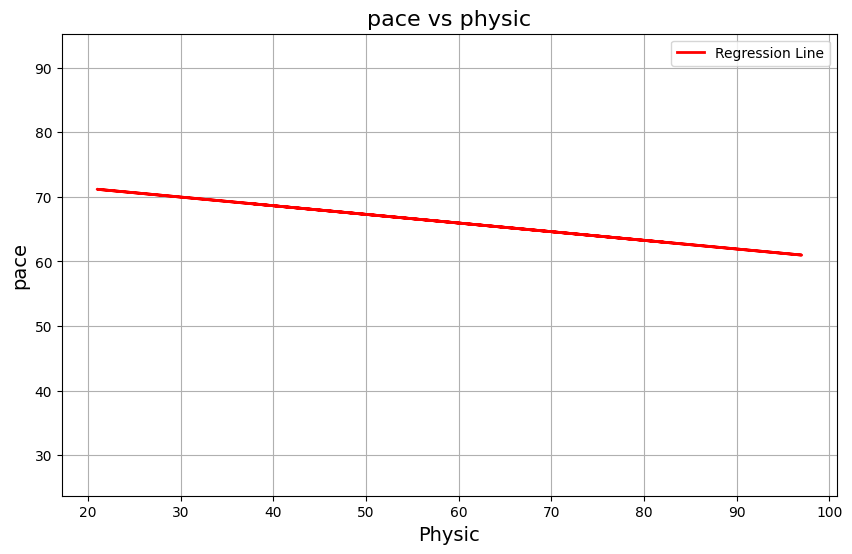

In [37]:
from scipy.stats import linregress

np.random.seed(0)
x = df_player['pace']
y = df_player['physic'] 


slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='white')
plt.plot(x, regression_line, color='red', label='Regression Line', linewidth=2)


plt.title("pace vs physic", fontsize=16)
plt.xlabel("Physic", fontsize=14)
plt.ylabel("pace", fontsize=14)


plt.legend()


plt.grid(True)
plt.show()

we can see from the graph that the pace decreases when the physic increases in other words slim players are fast but less robust, tall players are rather slow but more robust

## d)

In [38]:
# player with the highest wages
name=df_player.loc[df_player['wage_eur'].idxmax(),'long_name']
amount=df_player['wage_eur'].max()
print(f'The player who has recieved highest wage is {name} with wage of {amount/1000} thousand euros per week.')

The player who has recieved highest wage is Lionel Andrés Messi Cuccittini with wage of 575.0 thousand euros per week.


In [39]:
# player has recieved highest wage in Ea Sports FC 24 game
df_new_24= df_player[df_player['fifa_version']==24]
name2=df_new_24.loc[df_new_24['wage_eur'].idxmax(),'long_name']
amount2=df_new_24['wage_eur'].max()
print(f'The player who has recieved highest wage in EA Sports FC 24 game is {name2} with wage of {amount2/1000} thousand euros.')

The player who has recieved highest wage in EA Sports FC 24 game is Kevin De Bruyne with wage of 350.0 thousand euros.


In [40]:
# Sort the DataFrame by wage in descending order and getting the top 10 highest paid players
df_new = df_new_24.sort_values(by='wage_eur', ascending=False)
top_10_names = df_new['long_name'].head(10)

# Print the result
print('The top 10 highest paid players in the EA Sports FC 24 are:')
for i, name in enumerate(top_10_names, 1):
    print(f'{i}. {name}')

The top 10 highest paid players in the EA Sports FC 24 are:
1. Kevin De Bruyne
2. Erling Braut Haaland
3. Robert Lewandowski
4. Vinícius José Paixão de Oliveira Júnior
5. Federico Santiago Valverde Dipetta
6. Bernardo Mota Veiga de Carvalho e Silva
7. Mohamed Salah Ghaly
8. Bruno Miguel Borges Fernandes
9. Rúben dos Santos Gato Alves Dias
10. Rodrigo Hernández Cascante


## e)

In [41]:
# DataFrame for teams from Germany
df_new_germany = df_team[df_team['nationality_name'] == 'Germany']

# stadium should not be repeated
stadiums_names = df_new_germany['home_stadium'].unique()

print('The names of all German stadiums that are involved in the game from FIFA 15 up to EA Sports FC 24 are:')
for i, stadium in enumerate(stadiums_names, 1):
    print(f'{i}. {stadium}')


The names of all German stadiums that are involved in the game from FIFA 15 up to EA Sports FC 24 are:
1. Molton Road (Sheldon Stadium)
2. StrongHER Stadium
3. Sanderson Park (FIFA 13 NEW generic)
4. Deutsche Bank Park
5. PreZero Arena
6. Europa-Park Stadion
7. BayArena
8. _Oktigann Park
9. RheinEnergieStadion
10. Waldstadion (Fussballstadion)
11. Wohninvest Weserstadion
12. Red Bull Arena (Leipzig)
13. Max-Morlock-Stadion
14. BORUSSIA-PARK
15. Olympiastadion
16. Signal Iduna Park
17. Volkswagen Arena
18. Stadion An der Alten Försterei
19. Opel Arena
20. WWK Arena
21. Mercedes-Benz Arena (Stuttgart)
22. Vonovia Ruhrstadion
23. Volksparkstadion
24. Veltins-Arena
25. Forest Park Stadium (Square Ground)
26. HDI-Arena
27. Düsseldorf-Arena
28. Stadion Europa (Generic Europe 2)
29. Euro Arena
30. Benteler-Arena
31. Millerntor-Stadion
32. Stade Municipal
33. Sportpark Ronhof Thomas Sommer
34. Crown Lane
35. Stadion Neder
36. Court Lane
37. Town Park
38. SchücoArena
39. Euro Park
40. Stadion 2

## f)

In [42]:
# checking the dob of oldests coaches in the game.
df_coach['dob'].sort_values(ascending=True).head(5)

643    1945-07-29
1086   1945-09-10
1257   1947-09-02
498    1948-11-09
770    1949-09-03
Name: dob, dtype: datetime64[ns]

In [43]:
# getting the coach id of the oldest coach
coach_id_old=df_coach.loc[df_coach['dob'].idxmin(),'coach_id']

# checking if the coach is in the latest version of the game
df_team_24=df_team[df_team['fifa_version']==24]
df_detail=df_team_24[df_team_24['coach_id']==coach_id_old]
df_detail



,team_id,fifa_version,team_name,league_id,league_name,nationality_id,nationality_name,overall,attack,midfield,defence,coach_id,home_stadium,whole_team_average_age,captain,penalties,left_corner,right_corner,Sex
422,101047,24,Dynamo Kyiv,332,Premier League,49,Ukraine,71,69,71,70,459149.0,Stadion Olympik,23.61,244373.0,244373.0,244374.0,244374.0,1.0


 + as the coach is present in the latest version of the game so he is the oldest active coach nowadays

In [44]:
# getting th details of the coach
name= df_coach.loc[df_coach['dob'].idxmin(),'long_name']
dob=str(df_coach.loc[df_coach['dob'].idxmin(),'dob'])
print(f'The oldest coach active nowadays(EA Sports FC 24) is {name} with the dob of {dob[:10]}.')

The oldest coach active nowadays(EA Sports FC 24) is Mircea Lucescu with the dob of 1945-07-29.


## g)

we are visualizing all national teams in EA Sports FC 24 and number of players associated with each national team

In [45]:
# data frame for all male players who are in EA Sports FC 24
df_player_24=df_player[(df_player['fifa_version']==24)&(df_player['Sex']==1)]

In [46]:
# creating a new data frame with two columns only nationality name and nation team id.
df_national_players=df_player_24[['nationality_name','nation_team_id']]
df_national_players=df_national_players.sort_values(by='nationality_name',ascending=True)

# droping those rows who have nation_team_id as zero (players who do not play for their national team)   the value zero is set during task 1.
df_national_players=df_national_players[df_national_players['nation_team_id']!=0]
df_national_players


,nationality_name,nation_team_id
5916,Argentina,1369.0
7199,Argentina,1369.0
5787,Argentina,1369.0
8422,Argentina,1369.0
5796,Argentina,1369.0
...,...,...
8699,Wales,1367.0
10521,Wales,1367.0
8846,Wales,1367.0
10807,Wales,1367.0


In [47]:
# creating a new datafram which contain the count of players associated with national team.
count = df_national_players['nationality_name'].value_counts()
count_df = count.reset_index()
count_df.columns = ['nationality_name', 'count']
count_df.shape

(58, 2)

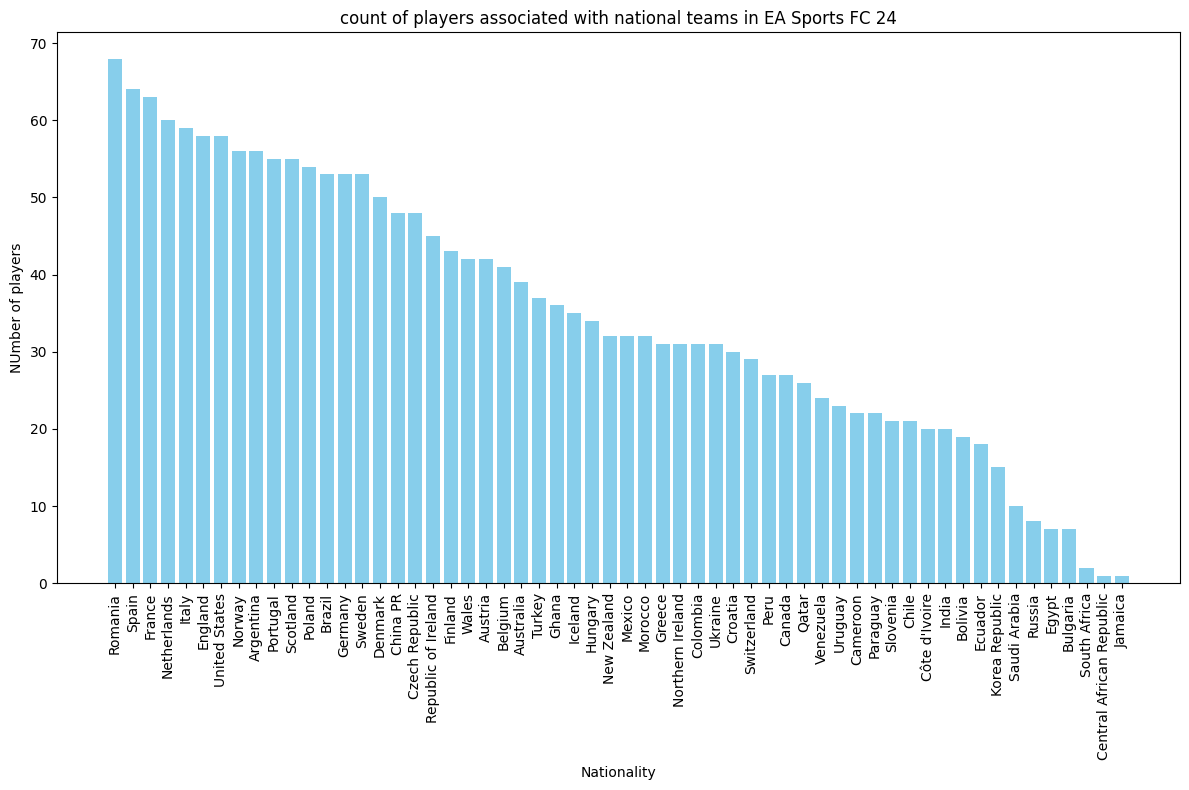

In [48]:
# plotting the result
plt.figure(figsize=(12, 8))
x=count_df['nationality_name']
y=count_df['count']
plt.bar(x, y,color='skyblue')
plt.xlabel('Nationality')
plt.ylabel('NUmber of players')
plt.title('count of players associated with national teams in EA Sports FC 24')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


## h)

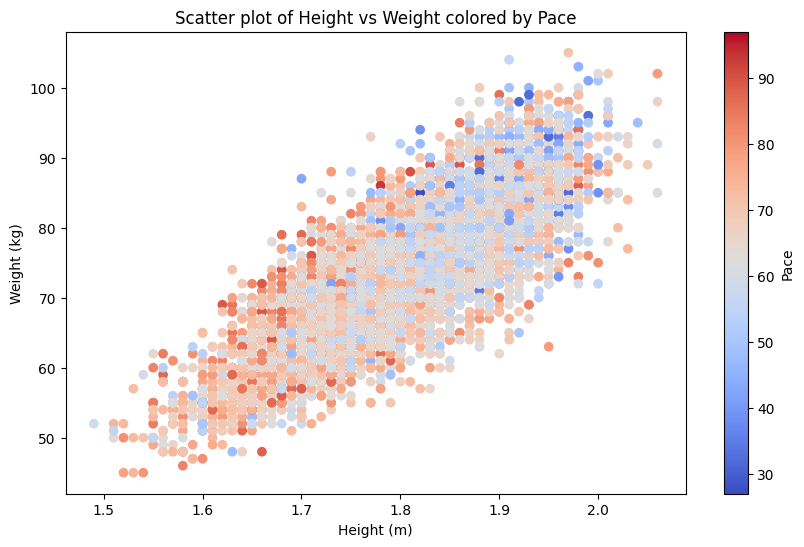

In [49]:
# creating a data frame which only contains players from EA Sports FC 24
df_players_24 = df_player[df_player['fifa_version'] == 24]

# Plotting scatter plot 
plt.figure(figsize=(10, 6)) 
plt.scatter(x=df_players_24['height_m'], y=df_players_24['weight_kg'], c=df_players_24['pace'], cmap='coolwarm', vmin=df_players_24['pace'].min(), vmax=df_players_24['pace'].max())
plt.colorbar(label='Pace')  
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.title('Scatter plot of Height vs Weight colored by Pace')
plt.show()


+ it can be seen that the players with high weight and large height are usually slow and the players with low weight and small height are usually fast

## i)


In [50]:
#creating a column named average skills
df_player['average_skills']=(df_player['pace']+df_player['shooting']+df_player['passing']+df_player['dribbling']+df_player['defending']+df_player['physic'])/6
df_player['average_skills']=df_player.loc[:,'average_skills'].astype(int)

C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\358390245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player['average_skills']=(df_player['pace']+df_player['shooting']+df_player['passing']+df_player['dribbling']+df_player['defending']+df_player['physic'])/6
C:\Users\kashi\AppData\Local\Temp\ipykernel_13704\358390245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player['average_skills']=df_player.loc[:,'average_skills'].astype(int)


In [51]:
# creating a data fram which has only players from EA Sports FC 24
df_player_24=df_player[(df_player['fifa_version']==24)]

In [52]:
# creating two data frames with only male players and only female players from EA Sports FC.
df_male_players=df_player_24[(df_player_24['Sex']==1)]
df_female_players=df_player_24[(df_player_24['Sex']==0)]

In [53]:
# male and female player ids with best skills
id_female = df_female_players.loc[(df_female_players['average_skills'].idxmax())]
id_male = df_male_players.loc[(df_male_players['average_skills'].idxmax())]

# male and female player skill and name
skill_male=id_male['average_skills']
skill_female=id_female['average_skills']
name_female=id_female['long_name']
name_male=id_male['long_name']
# printing the statements
print(f'The  female player with the best average in EA SPorts FC 24 skills is {name_female} with average skill of {skill_female}.')
print(f'The  male player with the best average skills in EA SPorts FC 24 is {name_male} with average skill of {skill_male}.')

The  female player with the best average in EA SPorts FC 24 skills is Alexia Putellas Segura with average skill of 84.
The  male player with the best average skills in EA SPorts FC 24 is Federico Santiago Valverde Dipetta with average skill of 83.


In [54]:
# getting the dataframe of players with best average skills
best_player = df_player[df_player['average_skills'] == df_player['average_skills'].max()]
best_player_name = best_player['long_name'].unique()

# making it proper for printing 
best_player_name = ', '.join(best_player_name)
# printing the statement

print(f'The players who have the best measured average skill across all versions are: {best_player_name}')

The players who have the best measured average skill across all versions are: Alexia Putellas Segura, Lucia Roberta Tough Bronze


In [55]:
# sorting the players according to average_skills
df_top_player=df_player.sort_values(by='average_skills', ascending=False).head(10)

# getting the name of all the players
names=df_top_player['long_name']

# printing the statement
print('The top 10 players with highest skills are:')
for i, name in enumerate(names, 1):
    print(f'{i}. {name}')

The top 10 players with highest skills are:
1. Alexia Putellas Segura
2. Lucia Roberta Tough Bronze
3. Alexia Putellas Segura
4. Federico Santiago Valverde Dipetta
5. Leon Christoph Goretzka
6. Fridolina Rolfö
7. Amel Majri
8. Carli Anne Hollins
9. Carli Anne Hollins
10. Carli Anne Hollins


+ some names are repeated which means that the player has different average skills in another version of the game but still makes it to top 10.

In [56]:
df_player.shape

(185056, 29)

## j)

In [57]:
# creating the new data frame with only players which are avilable in EA Sports FC 24
df_player_24=df_player[df_player['fifa_version']==24]


In [58]:
df_players_in_team=df_players_24[['club_name']]
df_players_in_team
player_count = df_players_in_team['club_name'].value_counts()
player_count_df = player_count.reset_index()
player_count_df.columns = ['club_name', 'count']
player_count_df.head()

,club_name,count
0,free_agent,148
1,Liverpool,53
2,River Plate,49
3,Sevilla,34
4,Nantes,34


In [59]:
# The fallwoing code is taken from chatgpt to get the values from index (0-20, 500-510, last 20)
entries = player_count_df['club_name'].iloc[:20].tolist() + player_count_df['club_name'].iloc[500:510].tolist() + player_count_df['club_name'].iloc[-20:].tolist()
counts = player_count_df['count'].iloc[:20].tolist() + player_count_df['count'].iloc[500:510].tolist() + player_count_df['count'].iloc[-20:].tolist()

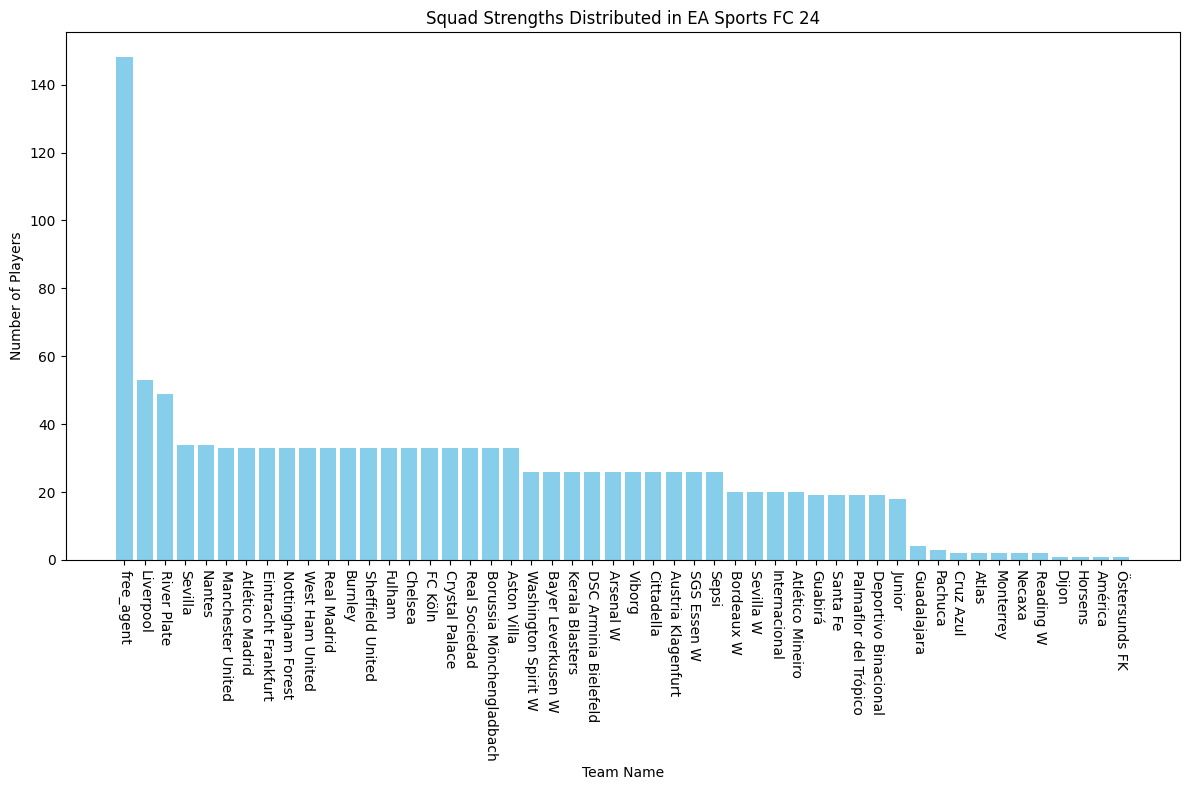

In [60]:
# plotting the graph
plt.figure(figsize=(12, 8))
plt.bar(entries ,counts ,color='skyblue')
plt.title('Squad Strengths Distributed in EA Sports FC 24')
plt.xlabel('Team Name')
plt.ylabel('Number of Players')
plt.xticks(rotation=-90)
plt.tight_layout()
plt.show()


+ the index values for teams in the above graph start from 0-20 and then 500 to 510 then last 20.

## k)

In [61]:
# number of teams in each game 
team_count = df_team.groupby('fifa_version').size().reset_index(name='number of teams')
team_count

,fifa_version,number of teams
0,15,625
1,16,664
2,17,693
3,18,712
4,19,713
5,20,733
6,21,746
7,22,751
8,23,753
9,24,788


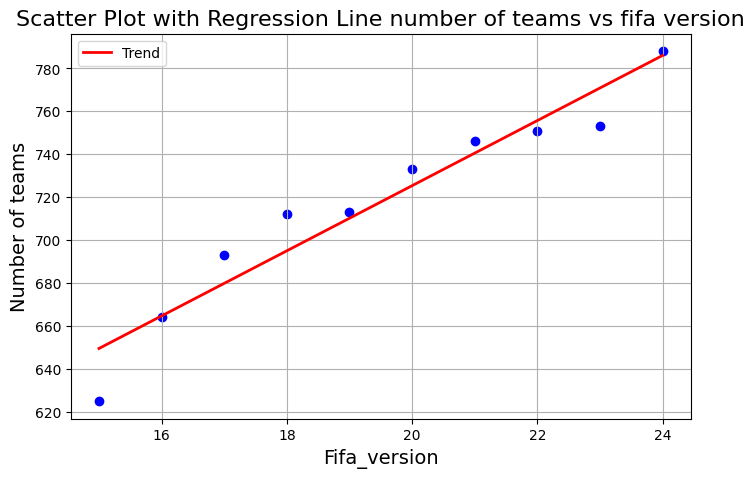

In [62]:
# ploting the number of teams w.rt fifa_version.
plt.figure(figsize=(8, 5))
x=team_count['fifa_version']
y=team_count['number of teams']

plt.scatter(x, y, color='blue')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Trend', linewidth=2)

plt.title("Scatter Plot with Regression Line number of teams vs fifa version", fontsize=16)
plt.xlabel("Fifa_version", fontsize=14)
plt.ylabel("Number of teams", fontsize=14)


plt.legend()


plt.grid(True)
plt.show()

+ it can be seen that for every latest game the total number of teams are added.

## l)

In [63]:
df_players_24=[df_player['fifa_version']==24]


In [64]:
teams_per_country = df_team.groupby('nationality_name').size().reset_index(name='number of teams').sort_values(by='number of teams',ascending=False)
coaches_per_country = df_coach.groupby('nationality_name').size().reset_index(name='number of coaches').sort_values(by='number of coaches',ascending=False)

In [65]:
teams_per_country.head(),coaches_per_country.head()

(   nationality_name  number of teams
 19          England              956
 22          Germany              531
 50            Spain              455
 21           France              438
 28            Italy              393,
    nationality_name  number of coaches
 55            Spain                138
 19          England                114
 23          Germany                110
 0         Argentina                103
 29            Italy                 83)

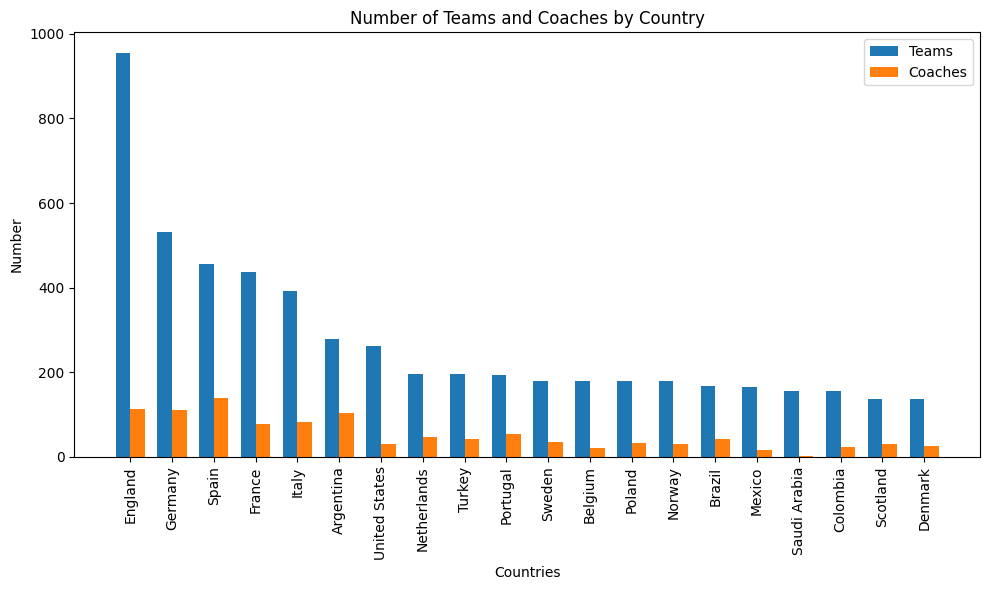

In [66]:
mix_data= teams_per_country.merge(coaches_per_country, on='nationality_name', how='outer')
mix_data.sort_values(by='number of teams', ascending=False, inplace=True)
mix_data = mix_data.head(20)

x = np.arange(len(mix_data['nationality_name'].head(20)))  # label locations
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mix_data['number of teams'], width, label='Teams')
bars2 = ax.bar(x + width/2, mix_data['number of coaches'], width, label='Coaches')

ax.set_xlabel('Countries')
ax.set_ylabel('Number')
ax.set_title('Number of Teams and Coaches by Country')
ax.set_xticks(x)
ax.set_xticklabels(mix_data['nationality_name'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

AS we can see in general if a country has more teams the country will have more coaches and if a country has less domestic teams it has less coaches but is is not necessary that the country with the most teams will have most coaches and vise versa.

In [67]:

coach=coaches_per_country.loc[coaches_per_country['number of coaches']==coaches_per_country['number of coaches'].max()]
coach_name=coach['nationality_name'].values[0]
team=teams_per_country.loc[teams_per_country['number of teams']==teams_per_country['number of teams'].max()]
team_name=team['nationality_name'].values[0]
print(f"Country with the most clubs: {team_name} with {team['number of teams'].values[0]} clubs.")
print(f"Country with the most coaches: {coach_name} with {coach['number of coaches'].values[0]} coaches.")

Country with the most clubs: England with 956 clubs.
Country with the most coaches: Spain with 138 coaches.


## m)

In [68]:
# creating a data fram with the given players
players=['Alexia Putellas Segura','Erling Braut Haaland','Kylian Mbappé Lottin','Lionel Andrés Messi Cuccittini','Cristiano Ronaldo dos Santos Aveiro']
df_new_players=df_player[df_player['long_name'].isin(players)]
# sorting the data frame w.r.t lone_name and fifa_version ascending and descending order.
df_new_players=df_new_players.sort_values(by=['long_name','fifa_version'],ascending=[True,False])

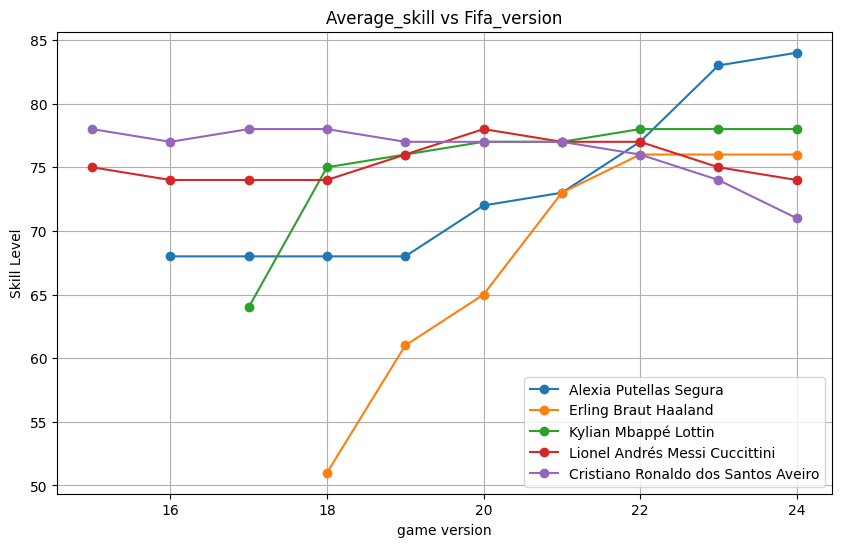

In [69]:
# Trend in skill level over the years
plt.figure(figsize=(10, 6)) 
for player in players:
    player_data = df_new_players[df_new_players['long_name'] == player]
    plt.plot(player_data['fifa_version'], player_data['average_skills'], marker='o', label=player)

plt.xlabel('game version')
plt.ylabel('Skill Level')
plt.title('Average_skill vs Fifa_version')
plt.legend()
plt.grid(True)
plt.show()

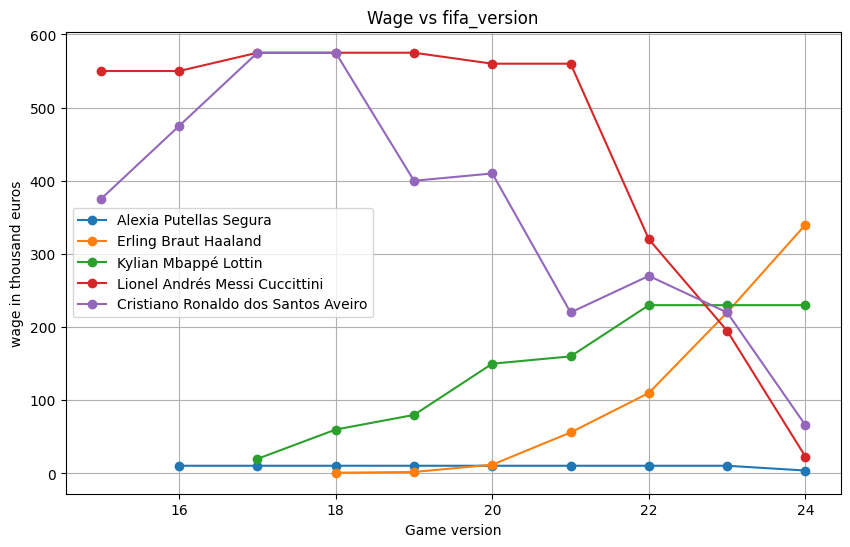

In [70]:
# plotting the trent in wages across all versions of the game
plt.figure(figsize=(10, 6)) 
for player in players:
    player_data = df_new_players[df_new_players['long_name'] == player]
    plt.plot(player_data['fifa_version'], player_data['wage_eur']/1000, marker='o', label=player)

plt.xlabel('Game version')
plt.ylabel('wage in thousand euros')
plt.title('Wage vs fifa_version')
plt.legend()
plt.grid(True)
plt.show()

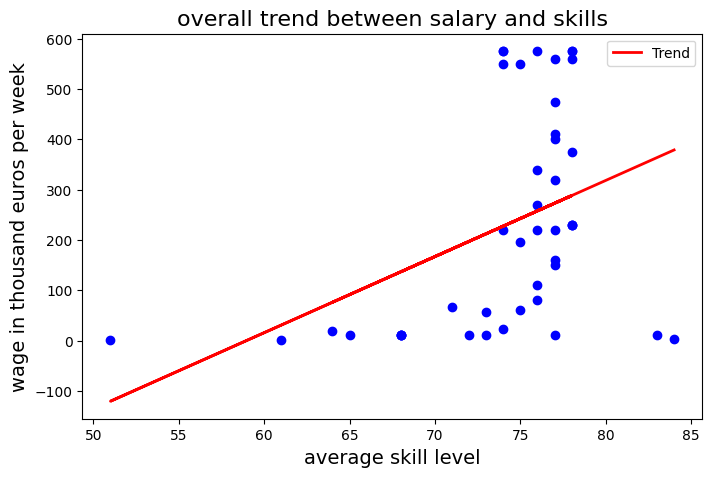

In [71]:
# Trend between salary and skills
plt.figure(figsize=(8, 5))
y=df_new_players['wage_eur']/1000
x=df_new_players['average_skills']

plt.scatter(x, y, color='b')

slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Trend', linewidth=2)

plt.title("overall trend between salary and skills", fontsize=16)
plt.ylabel("wage in thousand euros per week", fontsize=14)
plt.xlabel("average skill level", fontsize=14)

plt.legend()


plt.show()

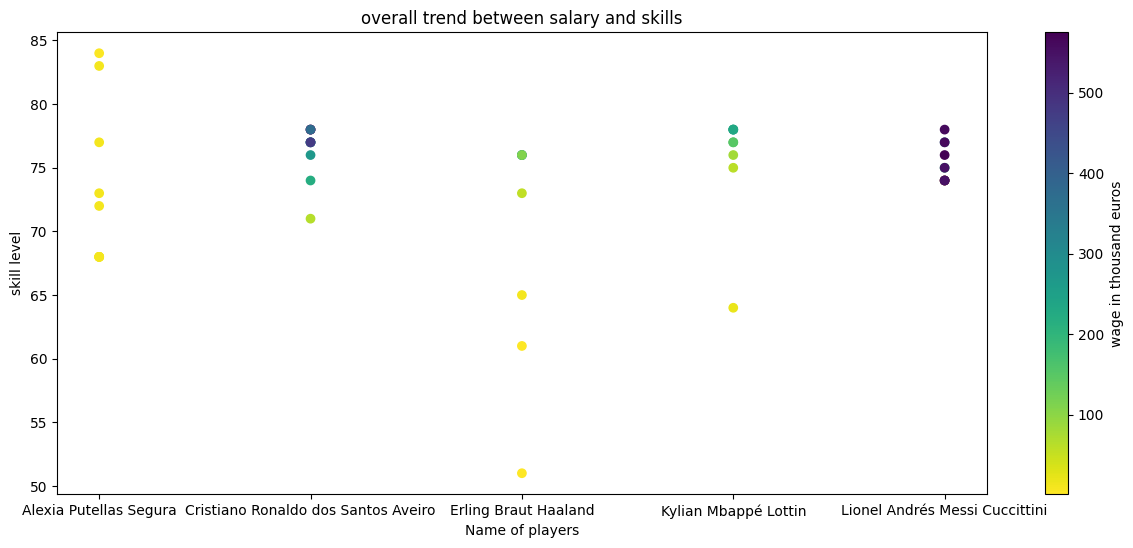

In [72]:
import  matplotlib.colors 

df = pd.DataFrame(df_new_players, columns=['long_name', 'wage_eur', 'average_skills'])


norm = matplotlib.colors.Normalize(vmin=(df['wage_eur']/1000).min(), vmax=(df['wage_eur']/1000).max())
cmap = plt.cm.viridis_r  

plt.figure(figsize=(15, 6))  
sc = plt.scatter(x=df['long_name'], y=df['average_skills'], c=df['wage_eur']/1000, cmap=cmap, norm=norm)
plt.colorbar(sc, label='wage in thousand euros') 
plt.xlabel('Name of players')
plt.ylabel('skill level')
plt.title('overall trend between salary and skills')
plt.show()


+ it can be seen that the skill level impacts the salary of the players but also depends on the popularity of the player